# EDA Steam Games 

Exploratory data analysis (EDA) is a fundamental phase in the process of understanding and preparing data. In this case, we have a dataset related to games from Steam, a digital distribution platform for video games. This EDA will focus on exploring the different characteristics of the games present in the dataset.


In this phase, we are going to use Python and some of its libraries, such as pandas, matplotlib and seaborn, to explore and visualize our dataset.

In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv("WORK_DIR")

sys.path.append(work_dir)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy.orm import sessionmaker, aliased
from src.database.db_connection import get_engine
from src.models.SteamGames_models import Games


C:\Users\saale\AppData\Local\Temp\ipykernel_23824\1262648629.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load dataset

In [3]:
connection = get_engine()

Session = sessionmaker(bind=connection)
session = Session()

Conected successfully to PruebaCarga


In [4]:
# Realizar la consulta y recuperar las primeras 5 filas
primeras_cinco_filas = session.query(Games).limit(1).all()

# Imprimir los resultados
for fila in primeras_cinco_filas:
    print(fila.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001E1DDB0FD00>, 'ReleaseDate': 'Oct 21, 2008', 'FullAudioLanguages': '[]', 'Linux': False, 'Achievements': 30, 'Developers': 'Perpetual FX Creative', 'EstimatedOwners': '0 - 20000', 'Reviews': None, 'MetacriticScore': 0, 'Recommendations': 0, 'Categories': 'Single-player,Multi-player,Steam Achievements,Partial Controller Support', 'PeakCCU': 0, 'HeaderImage': 'https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033', 'MetacriticUrl': None, 'Notes': None, 'Genres': 'Casual,Indie,Sports', 'RequiredAge': 0, 'Website': 'http://www.galacticbowling.net', 'UserScore': 0, 'AveragePlaytimeForever': 0, 'Tags': 'Indie,Casual,Sports,Bowling', 'Price': 19.99, 'SupportUrl': None, 'Positive': 6, 'AveragePlaytimeTwoWeeks': 0, 'Screenshots': 'https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005993.1920x1080.jpg?t=1

In [4]:
table = aliased(Games)
query = session.query(table).statement
games = pd.read_sql(query, connection)


Concise summary of the dataframe, including the number of rows and columns, the column names, the data types in each column, and the number of non-null values present in each column.

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AppID                    85103 non-null  int64  
 1   Name                     85097 non-null  object 
 2   ReleaseDate              85103 non-null  object 
 3   EstimatedOwners          85103 non-null  object 
 4   PeakCCU                  85103 non-null  int64  
 5   RequiredAge              85103 non-null  int64  
 6   Price                    85103 non-null  float64
 7   DLCCount                 85103 non-null  int64  
 8   AboutTheGame             81536 non-null  object 
 9   SupportedLanguages       85103 non-null  object 
 10  FullAudioLanguages       85103 non-null  object 
 11  Reviews                  9743 non-null   object 
 12  HeaderImage              85103 non-null  object 
 13  Website                  39452 non-null  object 
 14  SupportUrl            

Detailed summary of the DataFrame games, including information about columns, data types, missing values, number of rows, and number of unique values.

In [6]:
df_summary = {
    #'columns': games.columns,
    'types': games.dtypes,
    'missing': games.isna().sum(),
    'size': games.shape[0],
    #'unique': games.nunique()
}

print(pd.DataFrame(df_summary))

                           types  missing   size
AppID                      int64        0  85103
Name                      object        6  85103
ReleaseDate               object        0  85103
EstimatedOwners           object        0  85103
PeakCCU                    int64        0  85103
RequiredAge                int64        0  85103
Price                    float64        0  85103
DLCCount                   int64        0  85103
AboutTheGame              object     3567  85103
SupportedLanguages        object        0  85103
FullAudioLanguages        object        0  85103
Reviews                   object    75360  85103
HeaderImage               object        0  85103
Website                   object    45651  85103
SupportUrl                object    43517  85103
SupportEmail              object    13596  85103
Windows                     bool        0  85103
Mac                         bool        0  85103
Linux                       bool        0  85103
MetacriticScore     

We made a bar chart showing the number of columns of each type of data in the DataFrame games.

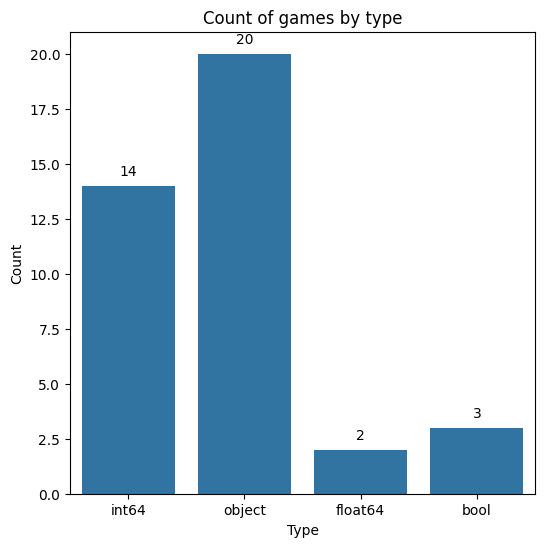

In [7]:
# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='types', data=df_summary)

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir etiquetas y título
plt.title('Count of games by type')
plt.xlabel('Type')
plt.ylabel('Count')

# Mostrar la gráfica
plt.show()

Release Date 

In [8]:
games['ReleaseDate'] = pd.to_datetime(games['ReleaseDate'], format='mixed')
games.head(2)

,AppID,Name,ReleaseDate,EstimatedOwners,PeakCCU,RequiredAge,Price,DLCCount,AboutTheGame,SupportedLanguages,...,AveragePlaytimeTwoWeeks,MedianPlaytimeForever,MedianPlaytimeTwoWeeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Name nullos 

In [9]:
games.loc[games['Name'].isna()].index

Index([25274, 72113, 77259, 77540, 77612, 77666], dtype='int64')

In [10]:
#Delete null names 
games = games.drop(games.loc[games['Name'].isna()].index)
games.isna().sum()

AppID                          0
Name                           0
ReleaseDate                    0
EstimatedOwners                0
PeakCCU                        0
RequiredAge                    0
Price                          0
DLCCount                       0
AboutTheGame                3562
SupportedLanguages             0
FullAudioLanguages             0
Reviews                    75354
HeaderImage                    0
Website                    45645
SupportUrl                 43511
SupportEmail               13590
Windows                        0
Mac                            0
Linux                          0
MetacriticScore                0
MetacriticUrl              81185
UserScore                      0
Positive                       0
Negative                       0
ScoreRank                  85053
Achievements                   0
Recommendations                0
Notes                      72079
AveragePlaytimeForever         0
AveragePlaytimeTwoWeeks        0
MedianPlay

In [11]:
games.loc[games['AboutTheGame'].isna(),"Name"]

10           Rogue Company Playtest
11        Celestial Empire Playtest
107                  溪风谷之战 Playtest
191           Burial Stone Playtest
226       Emperial Knights Playtest
                    ...            
85004              Elysium Playtest
85042              Dastaan Playtest
85063                    SlipBreak™
85089     Backpack Battles Playtest
85095    Scorching Engines Playtest
Name: Name, Length: 3562, dtype: object

Imputacion About the Game

In [12]:
games['AboutTheGame'].fillna('', inplace=True)


C:\Users\saale\AppData\Local\Temp\ipykernel_23824\1966714665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['AboutTheGame'].fillna('', inplace=True)


In [13]:
games.isna().sum()

AppID                          0
Name                           0
ReleaseDate                    0
EstimatedOwners                0
PeakCCU                        0
RequiredAge                    0
Price                          0
DLCCount                       0
AboutTheGame                   0
SupportedLanguages             0
FullAudioLanguages             0
Reviews                    75354
HeaderImage                    0
Website                    45645
SupportUrl                 43511
SupportEmail               13590
Windows                        0
Mac                            0
Linux                          0
MetacriticScore                0
MetacriticUrl              81185
UserScore                      0
Positive                       0
Negative                       0
ScoreRank                  85053
Achievements                   0
Recommendations                0
Notes                      72079
AveragePlaytimeForever         0
AveragePlaytimeTwoWeeks        0
MedianPlay

SupportedLanguages

In [14]:
games['SupportedLanguages']

0                                              ['English']
1        ['English', 'French', 'Italian', 'German', 'Sp...
2                       ['English', 'Portuguese - Brazil']
3        ['English', 'French', 'Italian', 'German', 'Sp...
4               ['English', 'Spanish - Spain', 'Japanese']
                               ...                        
85098                               ['English', 'Finnish']
85099                                          ['English']
85100                                          ['English']
85101                                          ['English']
85102                                          ['English']
Name: SupportedLanguages, Length: 85097, dtype: object

In [25]:
def clean_supported_languages(games):
    games['SupportedLanguages'] = games['SupportedLanguages'].str.replace("]", '') \
        .str.replace("'", "") \
        .str.replace("[", "") \
        .str.replace("]", "") \
        .str.replace("&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;", "")   \
        .str.replace("b/b", "") \
        .str.replace("/b", "")  \
        .str.replace(" \\r\\n\\r\\nb/b ", "") \
        .str.replace("/b", "") \
        .str.replace("\\r\\nb/b", "") \
        .str.replace("\\r\\n", "") \
        .str.replace("#", "") \
        .str.replace("\r\\n\\r\\n", "")     \
        .str.replace("Russian\\r\\nEnglish\\r\\nSpanish - Spain\\r\\nFrench\\r\\nJapanese\\r\\nCzech", "")  \
        .str.replace("\r\\n", "") \
        .str.replace(" &amp;lt;br /&amp;gt;&amp;lt;br /&amp;gt; ", "") \
        .str.replace("RussianEnglishSpanish - SpainFrenchJapaneseCzech", "") \
        .str.lstrip(", ") \
        .str.strip()
    
    return games

games = clean_supported_languages(games)

In [29]:
# Split de la columna SupportedLanguages
df_languages = games['SupportedLanguages'].str.strip("[]").str.split(', ', expand=True)

# Melt para llevar las columnas a filas
df_melted = pd.melt(df_languages, value_name='Language').dropna()['Language'].str.strip("'")

# Contar la frecuencia de cada lenguaje
language_counts = df_melted.value_counts().reset_index()

# Renombrar las columnas
language_counts.columns = ['Language', 'Frequency']

# Mostrar el resultado
language_counts

,Language,Frequency
0,English,78060
1,Simplified Chinese,19306
2,German,18652
3,French,18075
4,Russian,17383
...,...,...
110,"Hungarian,Polish",1
111,Japanese (all with full audio support),1
112,"English,German,Spanish - Spain,lang_français",1
113,Korean,1


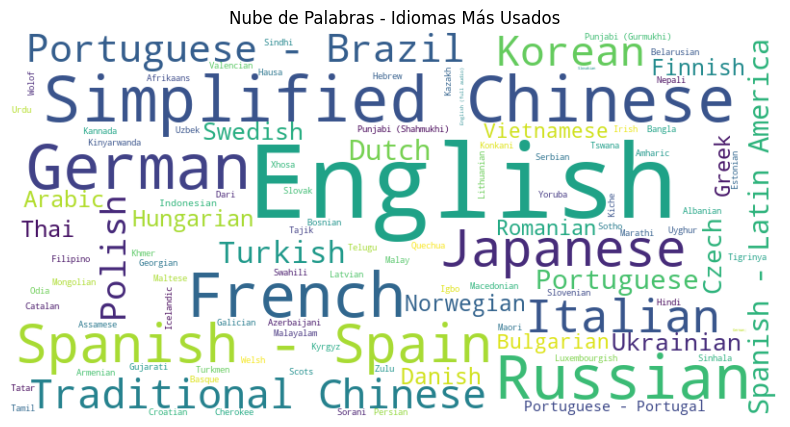

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Suponiendo que language_count_df es tu DataFrame con los datos
wordcloud_data = dict(zip(language_counts['Language'], language_counts['Frequency']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Idiomas Más Usados')
plt.show()

Developers	

In [18]:
unique_values = games['Developers'].unique()
print(unique_values)

['Perpetual FX Creative' 'Rusty Moyher' 'Campião Games' ...
 'Xamk Game Studios' '955 Games' 'MCA']


In [19]:
games.loc[games['Developers'].isna(),"Name"].unique()

array(['溪风谷之战 Playtest', 'Burial Stone Playtest',
       'Emperial Knights Playtest', ..., 'Dastaan Playtest',
       'Backpack Battles Playtest', 'Scorching Engines Playtest'],
      dtype=object)

Categories 

In [20]:
games['Categories'].fillna('Unknown', inplace=True)


C:\Users\saale\AppData\Local\Temp\ipykernel_20692\1265828108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Categories'].fillna('Unknown', inplace=True)


In [ ]:
games.isna().sum()

Genres

Tags 

In [ ]:
print(games['Tags'])

In [ ]:
from collections import Counter

# Supongamos que tienes un DataFrame llamado df y la columna es 'tags'
# df = ...

# Separar los tags y contar su frecuencia
tags_series = games['Tags'].str.split(',').dropna()
flattened_tags = [tag for sublist in tags_series for tag in sublist]
tag_counts = Counter(flattened_tags)

# Crear un nuevo DataFrame para mostrar los resultados
tags_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Ordenar el DataFrame por la columna 'Count' de mayor a menor
tags_df = tags_df.sort_values(by='Count', ascending=False)

# Mostrar los 10 tags más comunes (puedes ajustar esto según tus necesidades)
print(tags_df)
print(tags_df['Tag'].unique()) 


In [ ]:

# Separar los tags y contar su frecuencia
tags_series = games['Tags'].str.split(',').dropna()
flattened_tags = [tag for sublist in tags_series for tag in sublist]
tag_counts = Counter(flattened_tags)

# Crear un DataFrame para mostrar los resultados
tags_df = pd.DataFrame(list(tag_counts.items()), columns=['Tags', 'Count'])

# Ordenar el DataFrame por la columna 'Count' de mayor a menor
tags_df = tags_df.sort_values(by='Count', ascending=False)

# Relacionar los tags con la columna 'EstimatedOwners'
tags_and_owners = pd.merge(games[['Tags', 'EstimatedOwners']], tags_df, left_on='Tags', right_on='Tags', how='left')

# Mostrar los primeros 10 registros del DataFrame resultante
print(tags_and_owners)


Estimated Owners

In [56]:
games['EstimatedOwners'].value_counts()

EstimatedOwners
0 - 20000                55284
0 - 0                    11499
20000 - 50000             7808
50000 - 100000            3886
100000 - 200000           2566
200000 - 500000           2142
500000 - 1000000           906
1000000 - 2000000          521
2000000 - 5000000          329
5000000 - 10000000          92
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64

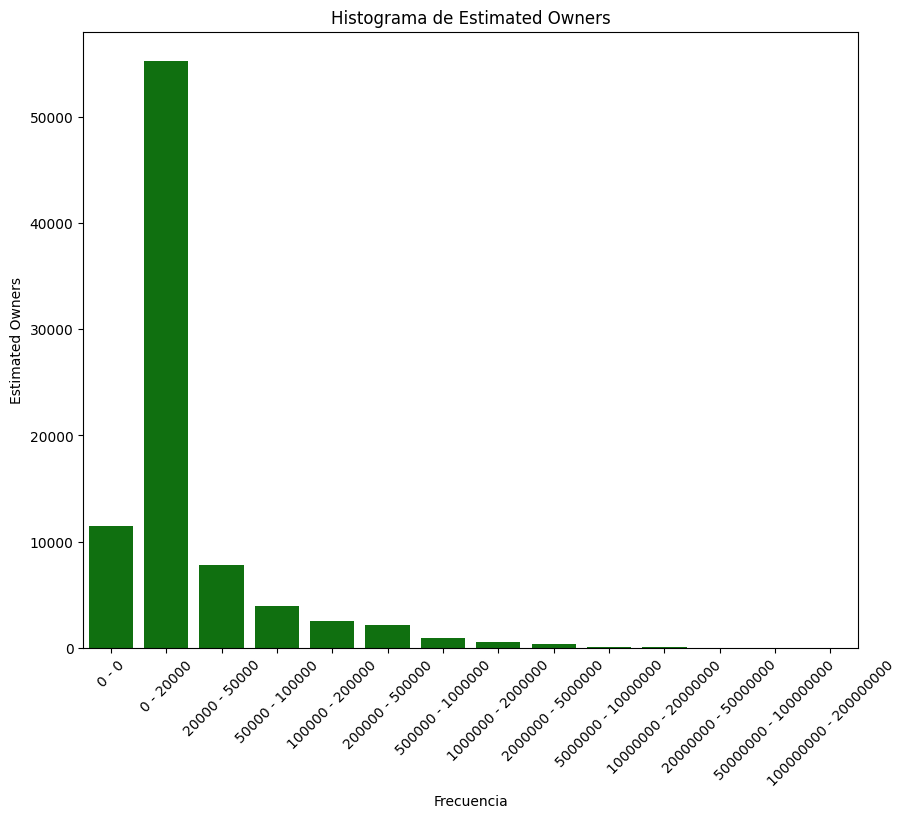

In [55]:
# Definir el orden correcto de las categorías
order = ['0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000',
         '100000 - 200000', '200000 - 500000', '500000 - 1000000',
         '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000',
         '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000', '100000000 - 200000000']

# Convertir la columna 'EstimatedOwners' a una categoría ordenada
games['EstimatedOwners'] = pd.Categorical(games['EstimatedOwners'], categories=order, ordered=True)

# Ordenar el DataFrame por la nueva columna 'EstimatedOwners'
games_sorted = games.sort_values(by='EstimatedOwners')

# Crear el gráfico de barras con Seaborn y ajustar el tamaño
plt.figure(figsize=(10, 8))
sns.countplot(x='EstimatedOwners', data=games_sorted, color='green')

plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Estimated Owners')
plt.title('Histograma de Estimated Owners')

# Mostrar el gráfico de barras
plt.show()


In [1]:
plt.hist(games['ReleaseDate'], bins=100)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Over the Years')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.hist(games['Price'], bins=list(range(0, 60)))
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [ ]:
print(games['Price'].value_counts())

In [ ]:
platform_counts = games[['Mac', 'Linux', 'Windows']].sum()

ax = platform_counts.plot(kind='bar')
for i, v in enumerate(platform_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Platform')
plt.ylabel('Number of games')
plt.title('Number of Games for Each Platform')
plt.show()

In [13]:
# 1 if the game it is paid, 0 if it is free

games['Free or paid'] = games.apply(lambda row: 1 if row['Price'] > 0 else 0, axis=1)

paid_and_free_count = games.groupby("Free or paid").agg({
    "Name":"count"
}).reset_index()
paid_and_free_count


,Free or paid,Name
0,0,16456
1,1,68641


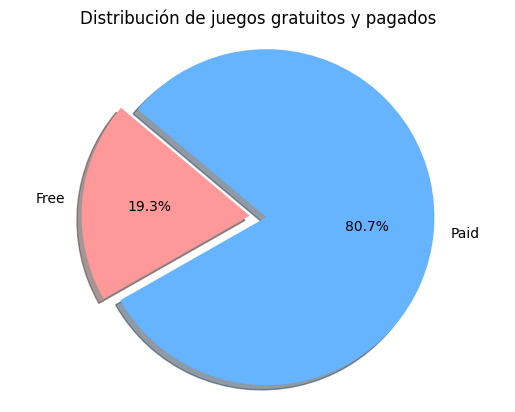

In [15]:
# Suponiendo que ya has calculado 'paid_and_free_count'

labels = ['Free', 'Paid']
sizes = paid_and_free_count['Name']
colors = ['#ff9999','#66b3ff']  # Colores para las categorías 'Free' y 'Paid'
explode = (0.1, 0)  # Explotar la primera porción (Free)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio garantiza que el gráfico sea circular
plt.title('Distribución de juegos gratuitos y pagados')

plt.show()